<a href="https://colab.research.google.com/github/SanjanaSuresh30/ML_LAB_1BM22CS239/blob/main/1BM22CS239_Lab_7_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Default accuracy (n_estimators=10): 1.0000


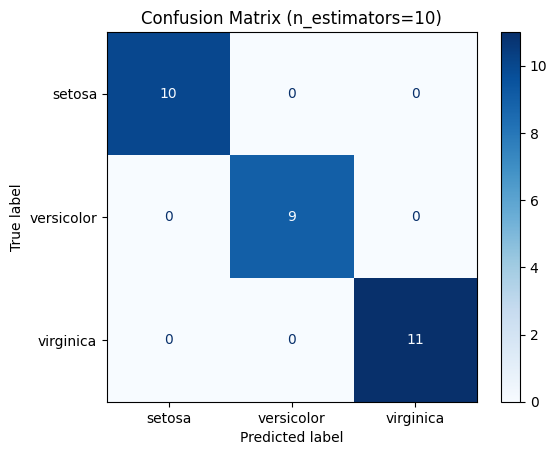

Best accuracy: 1.0000 using 1 trees


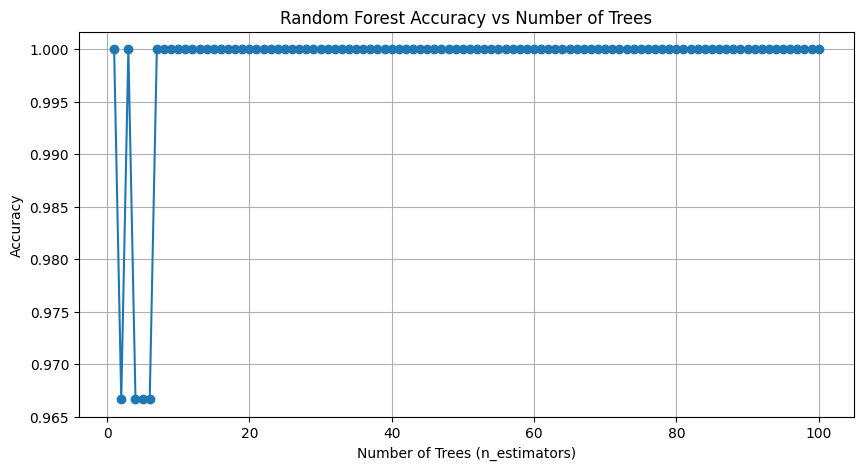

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("iris.csv")  # Make sure this file is in your directory

# Split features and target
X = df.drop("species", axis=1)
y = df["species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train default Random Forest (n_estimators=10)
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)

# Accuracy
default_accuracy = accuracy_score(y_test, y_pred_default)
print(f"Default accuracy (n_estimators=10): {default_accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_default, labels=rf_default.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_default.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (n_estimators=10)")
plt.show()

# Fine-tune: try different values of n_estimators
accuracies = []
tree_range = range(1, 101)

for n in tree_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Best accuracy and number of trees
best_accuracy = max(accuracies)
best_n = tree_range[accuracies.index(best_accuracy)]
print(f"Best accuracy: {best_accuracy:.4f} using {best_n} trees")

# Plot accuracy vs number of trees
plt.figure(figsize=(10, 5))
plt.plot(tree_range, accuracies, marker='o')
plt.title("Random Forest Accuracy vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
